# USANDO CARACTERISTICAS ESCALADAS Y PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')

In [3]:
train.head

<bound method NDFrame.head of       MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
Id                                      ...                                  
1             60       RL         65.0  ...        WD        Normal    208500
2             20       RL         80.0  ...        WD        Normal    181500
3             60       RL         68.0  ...        WD        Normal    223500
4             70       RL         60.0  ...        WD       Abnorml    140000
5             60       RL         84.0  ...        WD        Normal    250000
...          ...      ...          ...  ...       ...           ...       ...
1456          60       RL         62.0  ...        WD        Normal    175000
1457          20       RL         85.0  ...        WD        Normal    210000
1458          70       RL         66.0  ...        WD        Normal    266500
1459          20       RL         68.0  ...        WD        Normal    142125
1460          20       RL         

In [4]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
#Se eliminan las caracteristicas que tengan muchos datos nulos

train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
print(train.shape)

(1460, 76)


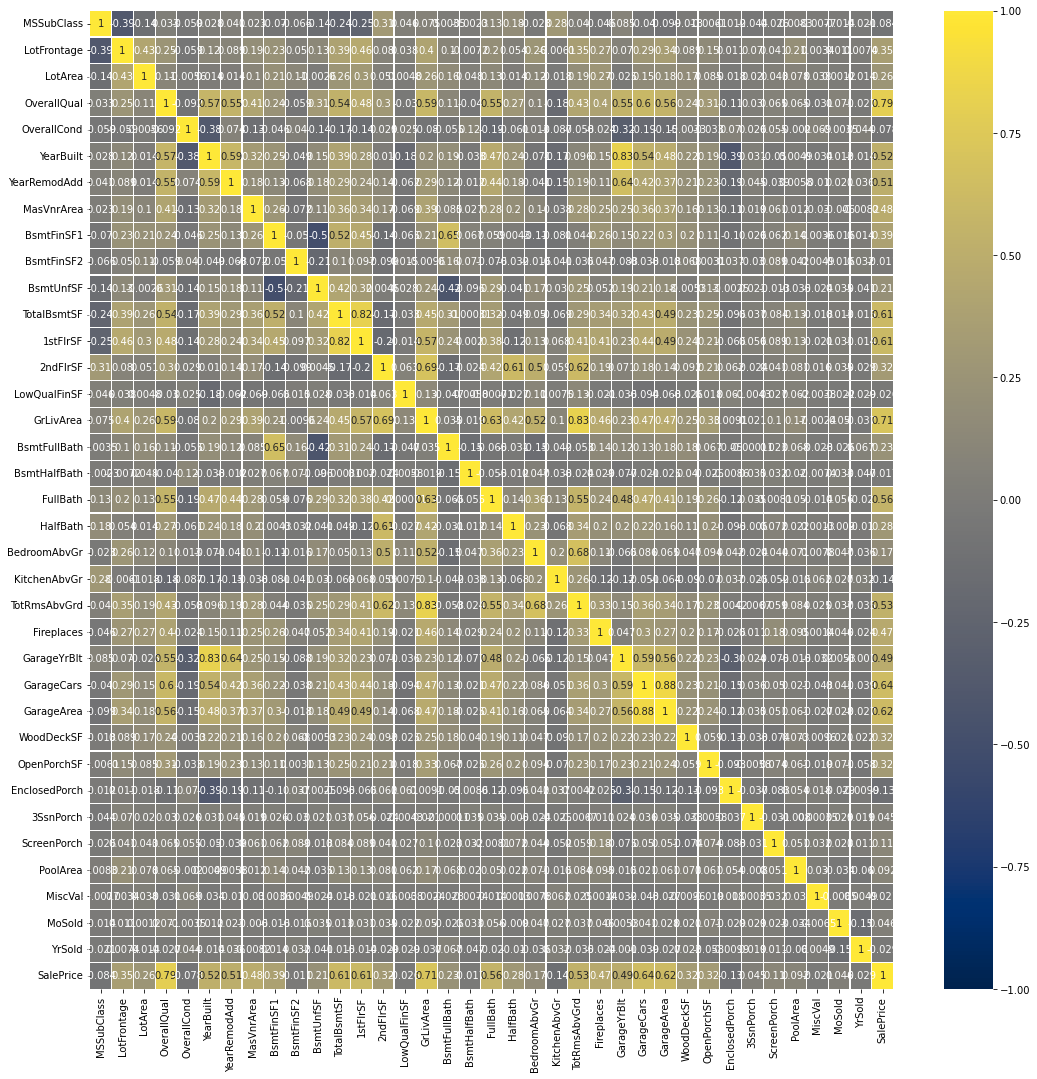

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
X_corr = train.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(X_corr, vmin=-1, vmax=1, cmap="cividis", annot=True, linewidth=0.1)

In [7]:
train.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

# USANDO CARACTERISTICAS CON MAYOR CORRELACIÓN

In [8]:
#Se usan solo las caracteristicas que tengan mayor correlación con el precio

main_features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']

In [9]:
X=train[main_features].copy()
Y=train['SalePrice']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

print(X_train.shape)
print(X_test.shape)

(1095, 10)
(365, 10)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("Original shape: {}".format(X_train.shape))
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

Original shape: (1095, 10)
transformed shape: (1095, 10)
per-feature minimum before scaling:
 OverallQual        1
GrLivArea        438
GarageCars         0
GarageArea         0
TotalBsmtSF        0
1stFlrSF         372
FullBath           0
TotRmsAbvGrd       3
YearBuilt       1872
YearRemodAdd    1950
dtype: int64
per-feature maximum before scaling:
 OverallQual       10
GrLivArea       5642
GarageCars         4
GarageArea      1418
TotalBsmtSF     6110
1stFlrSF        4692
FullBath           3
TotRmsAbvGrd      14
YearBuilt       2009
YearRemodAdd    2010
dtype: int64
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train_scaled, y_train)
pred=regr.predict(X_test_scaled)
print(regr.score(X_test_scaled, y_test))

MAE = mean_absolute_error(y_test,pred)

print("mean absolute error of model:", MAE)

0.8020138328218528
mean absolute error of model: 24542.240520619856


In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 150, random_state = 0)
regressor.fit(X_train_scaled, y_train)  
pred1=regressor.predict(X_test_scaled)
print(regressor.score(X_test_scaled, y_test))

MAE = mean_absolute_error(y_test,pred1)

print("mean absolute error of model:", MAE)

0.8843745082547466
mean absolute error of model: 18128.24290506632


In [22]:
from sklearn.tree import DecisionTreeRegressor
regressorTree = DecisionTreeRegressor(random_state = 0)
regressorTree.fit(X_train_scaled, y_train)  
pred2=regressorTree.predict(X_test_scaled)
print(regressorTree.score(X_test_scaled, y_test))

MAE = mean_absolute_error(y_test,pred2)

print("mean absolute error of model:", MAE)

0.7890909019174507
mean absolute error of model: 24693.53698630137


# HACIENDO USO DE CARACTERISTICAS ESCALADAS SE CONSIGUE UNA MEJORA EN TODOS LOS MODELOS, PERO EL QUE MEJOR RESULTADO PRESENTA ES EN RandomForestRegressor.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(X)
X_scaled = scaler2.transform(X)

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled) # Obtain the principal components
# transform/project dataset
X_pca = pca.transform(X_scaled)
print("X_pca.shape", X_pca.shape)


X_pca.shape (1460, 2)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.25)


regr = LinearRegression()
regr.fit(X_train, y_train)
pred=regr.predict(X_test)
print(regr.score(X_test, y_test))

MAE = mean_absolute_error(y_test,pred)

print("mean absolute error of model:", MAE)

0.7921044546943103
mean absolute error of model: 24984.564361187255


In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 150, random_state = 0)
regressor.fit(X_train, y_train)  
pred1=regressor.predict(X_test)
print(regressor.score(X_test, y_test))

MAE = mean_absolute_error(y_test,pred1)

print("mean absolute error of model:", MAE)

0.8074092600853805
mean absolute error of model: 23509.18067592955


In [50]:
from sklearn.tree import DecisionTreeRegressor
regressorTree = DecisionTreeRegressor(random_state = 0)
regressorTree.fit(X_train, y_train)  
pred2=regressorTree.predict(X_test)
print(regressorTree.score(X_test, y_test))

MAE = mean_absolute_error(y_test,pred2)

print("mean absolute error of model:", MAE)

0.6790022217284792
mean absolute error of model: 30344.671232876713


# HACER USO DE PCA CON LOS DATOS ESCALADOS EMPEORA LOS RESULTADOS EN TODOS LOS MODELOS.

# SIN EMBARGO, USAR PCA SIN ESCALAR LOS DATOS SE OBTIENEN RESULTADOS AUN PEORES.
